## Spaceship titanic

### Analiza Zadania
Zadaniem jest przewidziec czy pasażerowie zostali przetransportowani 
Mam do czynienia z uczeniem nadzorowanym w którym wykorzystujemy dane wejsciowe z etykietami aby nauczyc model przewiwywac wynik dla nowych danych
Zadanie to jest przykładem klasyfikacji binarnej która przewiduje jedna z dwóch klas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Analiza danych

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
sample_submission = pd.read_csv("../input/sample_submission.csv")

In [3]:
train.sample(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
6044,6396_01,Earth,False,E/427/S,TRAPPIST-1e,31.0,False,0.0,243.0,0.0,NaN,0.0,Josey Mandez,False


In [4]:
train.shape

(8693, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [9]:
test.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
2792,6187_01,Mars,True,F/1182/S,TRAPPIST-1e,47.0,False,0.0,0.0,0.0,0.0,0.0,Quan Bake
2161,4688_01,Earth,False,F/880/S,TRAPPIST-1e,26.0,False,755.0,0.0,109.0,0.0,0.0,Dia Buckentry
1597,3429_01,Europa,True,E/235/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Rasalm Monfulewss
3124,6845_01,Europa,True,A/69/P,55 Cancri e,60.0,False,0.0,0.0,0.0,0.0,0.0,Zanino Conaly
2104,4556_01,Mars,False,D/145/S,TRAPPIST-1e,17.0,False,1214.0,0.0,1365.0,0.0,0.0,Gibers Gread


In [10]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Wnioski z analizy
Dane zawierają 14 kolumn i 8693 wierszy
Dane sa zróznicowane z pod kątem typów:
- 7 kolumn zawiera ty tanych 'object' który moze zawierac dowolna wartosc, pop przejrzeniu przykłądowych danych sa to napisy
- 6 cech to watosci zmienno przecinkowe
- 1 cecha to wartosc boolowska (true/false)

Duzo wartosc jest pustych 

Wartoscii kategoryczne znajduja sie w kolumnach:
- HomePlanet (Earth,Europa,Mars)
- CryoSleep znajduje sie True/False
- Destination (TRAPPIST-1e, 55 Cancri e, PSO J318.5-22)
- VIP  znajduje sie True/Flase)

Cecha PassengerId to unikalny identyfikator każdego pasażera. Każdy identyfikator ma formę gggg_pp, gdzie gggg oznacza grupę, z którą podróżuje pasażer, a pp to jego numer w grupie. Osoby w grupie są często członkami rodziny, ale nie zawsze.

### Wizualizacja danych

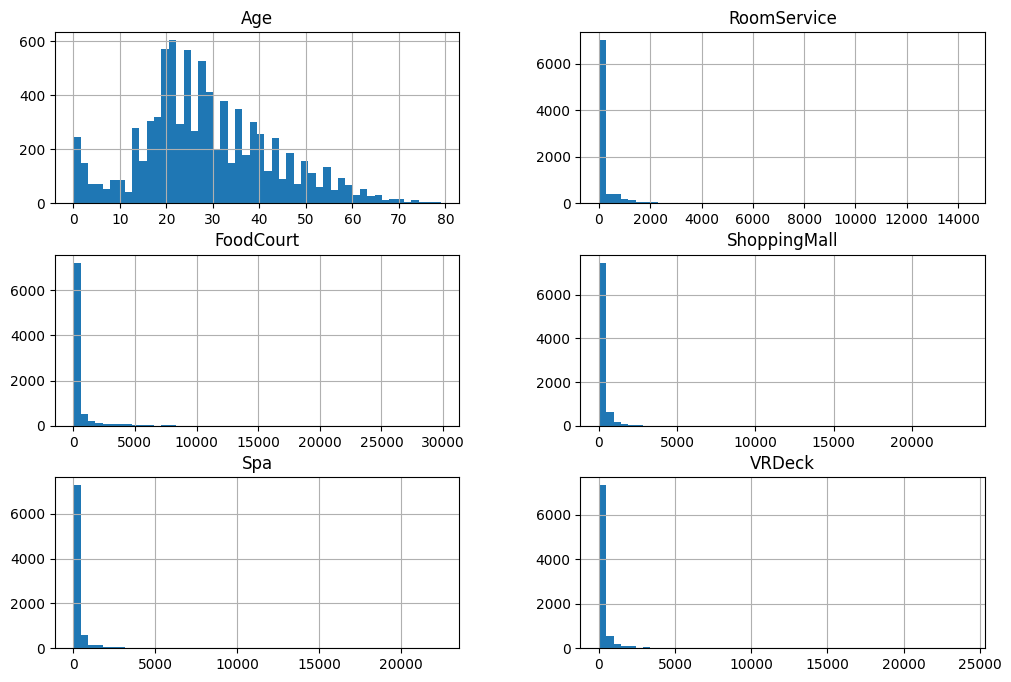

In [11]:
train.hist(bins = 50, figsize = (12,8))
plt.show()

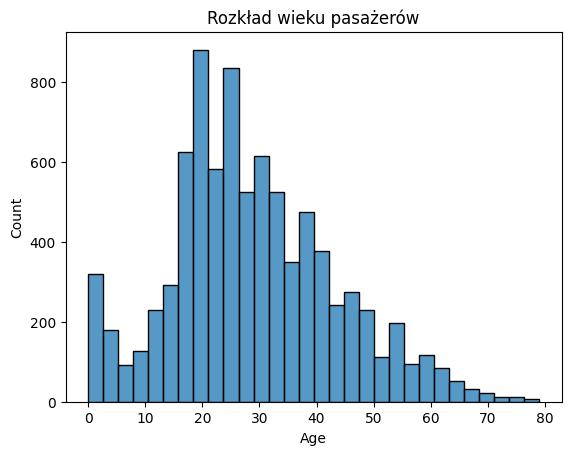

In [12]:
sns.histplot(train['Age'].dropna(), bins=30)
plt.title('Rozkład wieku pasażerów')
plt.show()

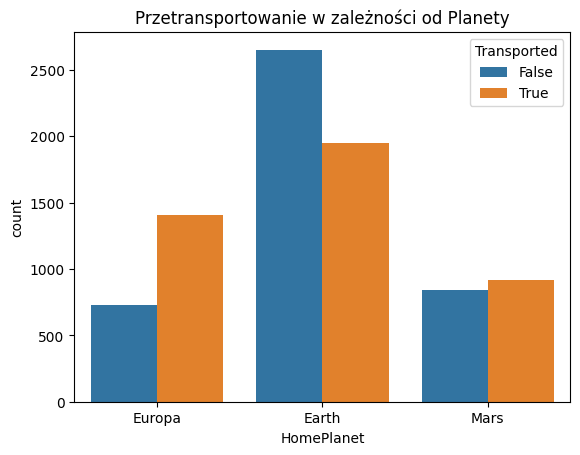

In [13]:
sns.countplot(x='HomePlanet', hue='Transported', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

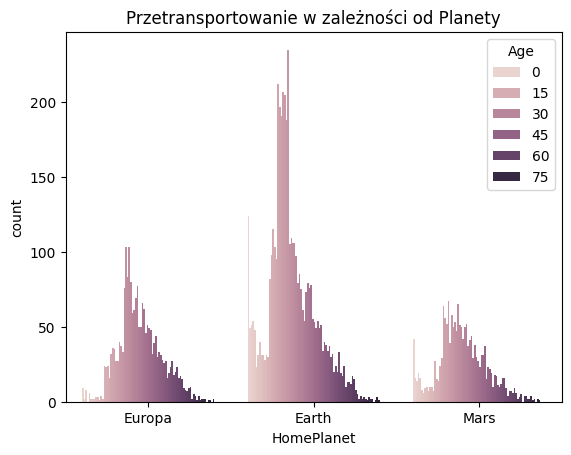

In [14]:
sns.countplot(x='HomePlanet', hue='Age', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

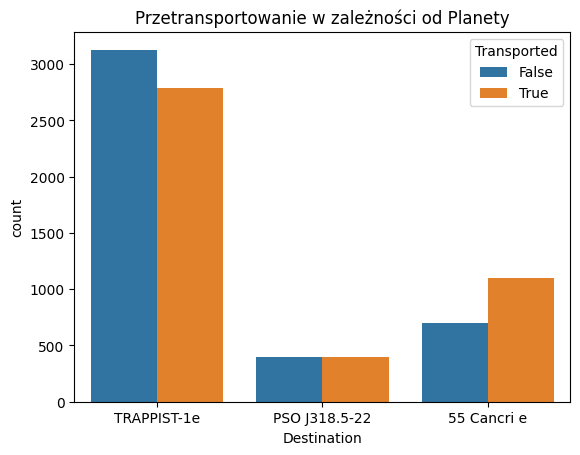

In [15]:
sns.countplot(x='Destination', hue='Transported', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

### Wnioski z Wizualizacji

### Zamiana danych kategorycznych na numeryczne i wypełnienie danych

Dane które bedzmiemy kowertowac musza byc zmienione dla dataset train i test

Moim plane jest:
- Ceche PassengerId nie trzeba uzupełniac ale rozdzile ja bo sa w niej zawarte grupy
- Ceche CryoSleep - wypełnic puste waartosci danymi z udogodnien na statki poniewa jezeli ktos spi to nie moze wydawac pieniedzy na statku
- Ceche Cabin - rozbije na poszczegolne sektory poniewaz zawartosc to prawdopodobnie pokład/numer kabiny/strona statku(prawa/lewa burta) i wypełnie modą
- Ceche Destination - wypełnie je używajac grup,moim założeniem jest ze pasażerowie z tej samej grupy maja ten sam cel podrózy, a jezeli nie napewno znajduja sie na tym samym pokładzie 
- Ceche Age - wypełnie moda
- Ceche VIP - wypełnie wartośćia False
- Ceche RoomService - wypełnie 0
- Ceche FoodCourt - wypełnie 0
- Ceche ShoppingMall - wypełnie 0
- Ceche Spa - wypełnie 0
- Ceche VRDeck - wypełnie 0
- Ceche Name - usune poniewaz nie beda przydatne  
- Ceche Transported - jest to target

In [16]:
train.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [17]:
train['GroupID']= train['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)
test['GroupID']= test['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)


In [18]:
train['GroupSize'] = train.groupby('GroupID')['PassengerId'].transform('count')
test['GroupSize'] = test.groupby('GroupID')['PassengerId'].transform('count')


Rozbiłem ceche PassengerId na 2 z której wybiore ilosc osó w grupie i Id grupy, informacje te sa zawarte w teksie na stronie Kaggle


### Uzupełnienie wartosci w kolumnie CryoSleep

Jezeli w kolumnach udogodnien pokładowych jest 0 to oznacza ze osoba spi.

In [19]:
lux = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in lux:
    train[col] = train[col].fillna(0)
    test[col] = train[col].fillna(0)



In [20]:
def sleep(row):
    if row['RoomService'] > 0 : return False
    if row['FoodCourt'] > 0 : return False
    if row['ShoppingMall'] > 0 : return False
    if row['Spa'] > 0 : return False
    if row['VRDeck'] > 0 : return False
    return True

train.loc[train['CryoSleep'].isnull(),'CryoSleep'] = train.apply(sleep, axis = 1)
test.loc[test['CryoSleep'].isnull(),'CryoSleep'] = test.apply(sleep, axis = 1)


In [21]:
train['cabin_first_label'] = train["Cabin"].map(lambda x: x.split("/")[0] if isinstance(x, str) and len(x.split("/")) > 0 else None)
train['cabin_secound_label'] = train["Cabin"].map(lambda x: x.split("/")[1] if isinstance(x, str) and len(x.split("/")) > 1 else None)
train['cabin_third_label'] = train["Cabin"].map(lambda x: x.split("/")[2] if isinstance(x, str) and len(x.split("/")) > 1 else None)

test['cabin_first_label'] = test["Cabin"].map(lambda x: x.split("/")[0] if isinstance(x, str) and len(x.split("/")) > 0 else None)
test['cabin_secound_label'] = test["Cabin"].map(lambda x: x.split("/")[1] if isinstance(x, str) and len(x.split("/")) > 1 else None)
test['cabin_third_label'] = test["Cabin"].map(lambda x: x.split("/")[2] if isinstance(x, str) and len(x.split("/")) > 1 else None)


In [22]:
# Grupuje wartosci z Destination według GroupID, jesli wiersz nie jest pusty wybieramy z kazdej grupyid pierwszy element mody w innym przypadku none  
most_common_destination = train.groupby("GroupID")["Destination"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# jesli wiersz w kolumnie destination jest pusty wypełniam go zmienna wyzej w innym przypadku przepisuje wartosc
train['Destination'] = train.apply(
    lambda row: most_common_destination[row['GroupID']] if pd.isna(row['Destination']) else row['Destination'],
    axis=1
)

# Grupuje wartosci z destination według cabin_first_label jesli nie jest moda pusta to wybierz pierwszy element mody w innym przypadku None
most_common_by_deck = train.groupby('cabin_first_label')['Destination'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# jesli wiersz w kolumnie destination jest pusty i jesli wartosc cabin_first_label jest w most_common_by_deck zwraca mode z poprzedniej zmiennej
train['Destination'] = train.apply(lambda row: most_common_by_deck[row['cabin_first_label']] 
                                   if pd.isna(row['Destination']) and row['cabin_first_label'] in most_common_by_deck 
                                   else row['Destination'],axis=1
                                  )


most_common_destination = test.groupby("GroupID")["Destination"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# jesli wiersz w kolumnie destination jest pusty wypełniam go zmienna wyzej w innym przypadku przepisuje wartosc
test['Destination'] = test.apply(
    lambda row: most_common_destination[row['GroupID']] if pd.isna(row['Destination']) else row['Destination'],
    axis=1
)

# Grupuje wartosci z destination według cabin_first_label jesli nie jest moda pusta to wybierz pierwszy element mody w innym przypadku None
most_common_by_deck = test.groupby('cabin_first_label')['Destination'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# jesli wiersz w kolumnie destination jest pusty i jesli wartosc cabin_first_label jest w most_common_by_deck zwraca mode z poprzedniej zmiennej
test['Destination'] = test.apply(lambda row: most_common_by_deck[row['cabin_first_label']] 
                                   if pd.isna(row['Destination']) and row['cabin_first_label'] in most_common_by_deck 
                                   else row['Destination'],axis=1
                                  )




In [23]:
train['is_alone'] = train['GroupID'].map(lambda x: 1 if x == 1 else 0)
test['is_alone'] = test['GroupID'].map(lambda x: 1 if x == 1 else 0)


In [24]:
# Wypełnianie brakujących wartości dla zmiennych kategorycznych
train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['Cabin'] = train['Cabin'].fillna('-1')
train['VIP'] = train['VIP'].fillna(False)
train['cabin_first_label'] = train['cabin_first_label'].fillna(train['cabin_first_label'].mode()[0])
train['cabin_secound_label'] = train['cabin_secound_label'].fillna(train['cabin_secound_label'].mode()[0])
train['cabin_third_label']  = train['cabin_third_label'] .fillna(train['cabin_third_label'].mode()[0])
train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])


test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['Cabin'] = test['Cabin'].fillna('Unknown')
test['VIP'] = test['VIP'].fillna(False)
test['cabin_first_label'] = test['cabin_first_label'].fillna(test['cabin_first_label'].mode()[0])
test['cabin_secound_label'] = test['cabin_secound_label'].fillna(test['cabin_secound_label'].mode()[0])
test['cabin_third_label']  = test['cabin_third_label'] .fillna(test['cabin_third_label'].mode()[0])
test['Destination'] = test['Destination'].fillna(test['Destination'].mode()[0])

# Wypełnianie brakujących wartości dla zmiennej 'Age'
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

C:\Users\MOlsz\AppData\Local\Temp\ipykernel_17164\3984883735.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['VIP'] = train['VIP'].fillna(False)
C:\Users\MOlsz\AppData\Local\Temp\ipykernel_17164\3984883735.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['VIP'] = test['VIP'].fillna(False)


In [25]:
cabin_first_label_dict = {
    'A':1,'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8
}
train['cabin_first_label'] = train['cabin_first_label'].map(cabin_first_label_dict)
test['cabin_first_label'] = test['cabin_first_label'].map(cabin_first_label_dict)


In [26]:
cabin_third_label_dict = {'S':1,'P':2}
train['cabin_third_label'] = train['cabin_third_label'].map(cabin_third_label_dict)
test['cabin_third_label'] = test['cabin_third_label'].map(cabin_third_label_dict)

In [27]:
train['cabin_secound_label'] = train['cabin_secound_label'].astype('int') 
test['cabin_secound_label'] = test['cabin_secound_label'].astype('int') 

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 

categorial_col = ['HomePlanet', 'Destination','CryoSleep','VIP' ]

train['Transported'] = le.fit_transform(train['Transported'])

for col in categorial_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
    



In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          8693 non-null   object 
 1   HomePlanet           8693 non-null   int32  
 2   CryoSleep            8693 non-null   int32  
 3   Cabin                8693 non-null   object 
 4   Destination          8693 non-null   int32  
 5   Age                  8693 non-null   float64
 6   VIP                  8693 non-null   int64  
 7   RoomService          8693 non-null   float64
 8   FoodCourt            8693 non-null   float64
 9   ShoppingMall         8693 non-null   float64
 10  Spa                  8693 non-null   float64
 11  VRDeck               8693 non-null   float64
 12  Name                 8493 non-null   object 
 13  Transported          8693 non-null   int64  
 14  GroupID              8693 non-null   int32  
 15  GroupSize            8693 non-null   i

### Tworzenie Modelu

In [30]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from scikitplot.estimators import plot_learning_curve

from sklearn.model_selection import cross_val_score

X  = train.drop(['Cabin','Name','PassengerId','Transported'], axis = 1)
y = train['Transported']

cross_val_score(DummyClassifier(strategy='stratified', random_state=42),X,y, cv = 5).mean()

0.49453589916827195

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HomePlanet           8693 non-null   int32  
 1   CryoSleep            8693 non-null   int32  
 2   Destination          8693 non-null   int32  
 3   Age                  8693 non-null   float64
 4   VIP                  8693 non-null   int64  
 5   RoomService          8693 non-null   float64
 6   FoodCourt            8693 non-null   float64
 7   ShoppingMall         8693 non-null   float64
 8   Spa                  8693 non-null   float64
 9   VRDeck               8693 non-null   float64
 10  GroupID              8693 non-null   int32  
 11  GroupSize            8693 non-null   int64  
 12  cabin_first_label    8693 non-null   int64  
 13  cabin_secound_label  8693 non-null   int32  
 14  cabin_third_label    8693 non-null   int64  
 15  is_alone             8693 non-null   i

In [32]:
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X, y, scoring='accuracy', cv=5).mean()

0.6909153111684757

In [33]:
cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42), X, y, scoring='accuracy', cv=5).mean()

0.7419796703394873

### Walidacja z podziałem na grupy

In [34]:
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb


In [35]:
groups = train['GroupID']

gkf = GroupKFold(n_splits=5)

cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=500, random_state=42), X, y, scoring='accuracy', cv=gkf, groups = groups).mean()

0.7424352050799667

In [36]:
cross_val_score(ExtraTreesClassifier(max_depth=3, n_estimators=500, random_state=42), X, y, scoring='accuracy', cv=gkf, groups = groups).mean()

0.7254104213166966

In [37]:
cross_val_score(xgb.XGBClassifier(random_state=42, n_estimators=500, learning_rate=0.01), X, y, scoring='accuracy', cv=gkf, groups = groups).mean()

0.8052453991586768

#### Model XGBoost (extreme Gradient Boosting)
Zaawansowana metoda uczenia maszynowego oparta na algorytmie gradient boostingu

### Walidacja stratyfikowana

- Dzieli odpowiednio dane
- jest odpowiednia dal klasyfikacji

Średnia dokładność: 0.7970


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

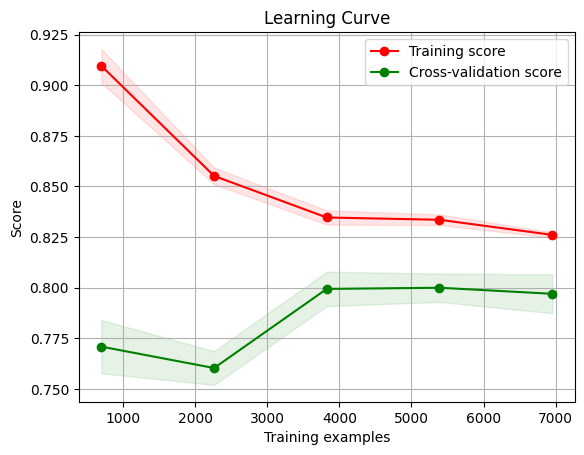

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle= True, random_state = 42)
model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)

accuracies = []
                      
for train_index, val_index in skf.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val,y_pred)
    accuracies.append(accuracy)
    
print(f'Średnia dokładność: {sum(accuracies)/len(accuracies):.4f}')
plot_learning_curve(model, X, y, cv=skf)


Średnia dokładność: 0.8070


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

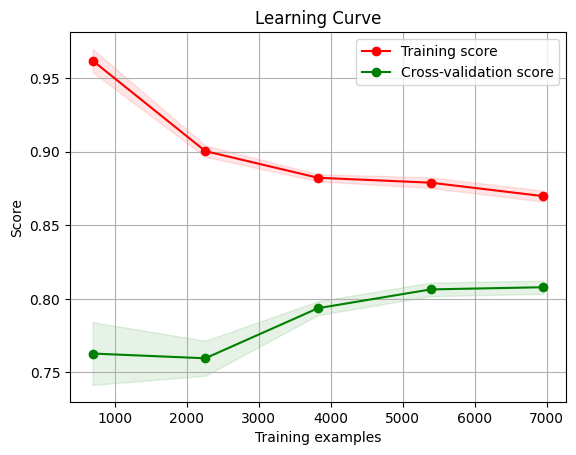

In [39]:
accuracies_xgb = []
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=800,
    learning_rate=0.01
)

# Modelowanie za pomocą StratifiedKFold
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    xgb_model.fit(X_train, y_train)
    
    # Przewidywania na zbiorze walidacyjnym
    y_pred = xgb_model.predict(X_val)
    
    # Obliczanie dokładności
    accuracy = accuracy_score(y_val, y_pred)
    accuracies_xgb.append(accuracy)

# Średnia dokładność z 5-fold stratified cross-validation
print(f'Średnia dokładność: {sum(accuracies_xgb)/len(accuracies_xgb):.4f}')
plot_learning_curve(xgb_model, X, y, cv=skf)

### Zastosowanie RandomizedSearchCV

Wyrałem ten mechanizm przeszukiwania w którym nie sa sprawdzane wszystkie mozliwe kombinacje, lecz nastepuje ewaluacja stałej liczby losowych kombinacji poprzez dobór lowoej wartosci hiperparametru w kazdym przebiegu.

GridSearchCV testuje kazda mozliwa kombinacje wartosci hiperparametrów jest to czasochłonny proces.
RandomizedSearchCV  losowo wybiera okreslona liczbe kombinacji do przetestowania, poprzez zdefiniowanie ilosci kombinacji (n_iter)

Ustawiamy granice dolna i górna wybranych hiperparametow, 

Najlepsze parametry: {'colsample_bytree': 0.8545641645055122, 'learning_rate': 0.04143559810763267, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 494, 'reg_alpha': 0.024929222914887497, 'reg_lambda': 1, 'subsample': 0.7641531692142519}
Najlepsza dokładność: 0.8081955427749821


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

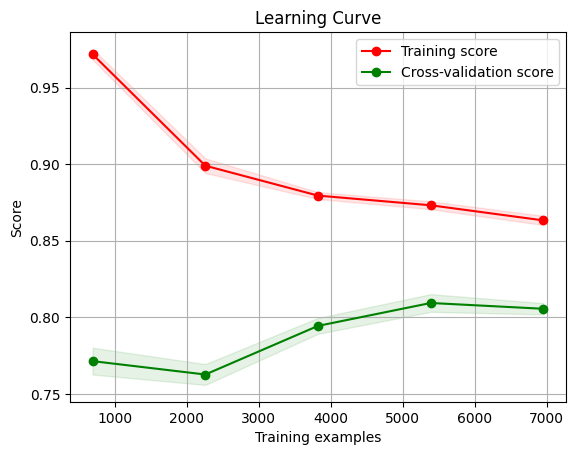

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_grid_xgb = {
    'n_estimators': randint(low =10, high = 1000), # oznacza ilosc drzew
    'learning_rate': uniform(0.01, 0.1), # krok uczenia sie(tempo uczenia sie mniejsza wartosc oznacza wolniejsze ale bardziej stabilne uczenie)
    'max_depth': randint(low =1 , high = 7), # maksymalna głebokosc każdego drzewa wartosc None oznacza brak oganiczenia 
    'min_child_weight': randint(low =1, high = 5), #minimalna waga obserwacji dla danego węzła
    'subsample': uniform(0.6, 0.4), # podzbiór na którym model uczy sie (wtedy jak jest overfitting, zmniejsz z 1.0 do 0.8 czy nawet do 0.6).
    'colsample_bytree': uniform(0.6, 0.4), # podobnie jak sample, tylko na kolumnach (cechach). Zmniejsz wtedy gdy pojawia sie overfitting
    'reg_alpha': uniform(0, 0.1),
    'reg_lambda': randint(low =1, high = 2)
}

xgb_model_rand = xgb.XGBClassifier(random_state=42,verbosity = 0)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model_rand, #model który bedzie optymalizowany 
    param_distributions=param_grid_xgb, #przestrzen hiperparametrów do przeszukania 
    n_iter=100, #liczba losowy kombinacji parametrów do przetestowania 
    scoring='accuracy', # kryterium oceny modelu
    random_state=42, # ziarno dla powtarzalnych wyników
    n_jobs=-1, # pozwala na uzycie wszystkich dostepnych procesów do równoległego przetwarzania
    cv = skf # walidacja stratyfikowana 
)

random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_
print("Najlepsze parametry:", best_params_xgb)
print("Najlepsza dokładność:", best_score_xgb)

#Robie wykres uczenia sie najlepszego modelu jaki został wytrenowany
plot_learning_curve(random_search_xgb.best_estimator_, X, y, cv=skf)


In [41]:
import lightgbm as lgb

# Inicjalizacja modelu LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42, verbosity = 0)

# RandomizedSearchCV na całym zbiorze treningowym
random_search_lgb = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid_xgb,
    n_iter=100, 
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    cv=skf
)

random_search_lgb.fit(X, y)

best_params_lgb = random_search_lgb.best_params_
best_score_lgb = random_search_lgb.best_score_
print("Najlepsze parametry:", best_params_lgb)
print("Najlepsza dokładność:", best_score_lgb)

plot_learning_curve(random_search_lgb.best_estimator_, X, y, cv=skf)



ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
import catboost as ctb

param_grid_ctb = {
    'n_estimators': randint(low =100 , high = 1000), # liczba drzew decyzyjnych
    'learning_rate': uniform(0.01, 0.1), # szybkosc uczenia 
    'depth': randint(low =4 , high = 10),  # maksymalna głebokosc uczenia 
    'l2_leaf_reg': randint(low =3 , high = 8),  # wpływa na regularyzajce modelu, zmniejsza złozonosc drzewa 
    'bagging_temperature': randint(low =0.5 , high = 2),  # kontroluje intensywnosc baggingu czyli losowego wybiernia próbek
    'random_strength':  randint(low =1 , high = 10), # dodaje losowac do drzewa
    'scale_pos_weight': randint(low =1 , high = 3) # 
}

# Inicjalizacja modelu LightGBM
ctb_model = ctb.CatBoostClassifier(random_state=42, verbose=0)

# RandomizedSearchCV na całym zbiorze treningowym
random_search_ctb = RandomizedSearchCV(
    estimator=ctb_model,
    param_distributions=param_grid_ctb,
    n_iter=100,  
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    cv=skf
)

# Trenowanie RandomizedSearchCV
random_search_ctb.fit(X, y)

best_params_ctb = random_search_ctb.best_params_
best_score_ctb = random_search_ctb.best_score_
print("Najlepsze parametry:", best_params_ctb)
print("Najlepsza dokładność:", best_score_ctb)

plot_learning_curve(random_search_xgb.best_estimator_, X, y, cv=skf)


### Wnioski



### Trenowanie najlepszego modelu na zbiorze testowym

Przetrenowany model w najlepszymi parametrami bede trenowac na zbiorze testowym.

In [ ]:
param_grid_ctb_final = {
    'bagging_temperature': 0.5,
    'depth': 6,
    'l2_leaf_reg': 10,
    'learning_rate': 0.05,
    'n_estimators': 500,
    'random_strength': 10,
    'scale_pos_weight': 1,
    'early_stopping_rounds': 50
}

final_model = ctb.CatBoostClassifier(**param_grid_ctb_final, random_state=42, verbose=0)
final_accuracies = []
for train_index, val_index in skf.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    final_model.fit( X_train, y_train)
    y_pred = final_model.predict(X_val)
    accuracy = accuracy_score(y_val,y_pred)
    final_accuracies.append(accuracy)


print(f'Średnia dokładnosc: {sum(final_accuracies)/len(final_accuracies):.4f}')

plot_learning_curve(final_model, X, y, cv=skf)


Średnia dokładnosc: 0.8003


<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

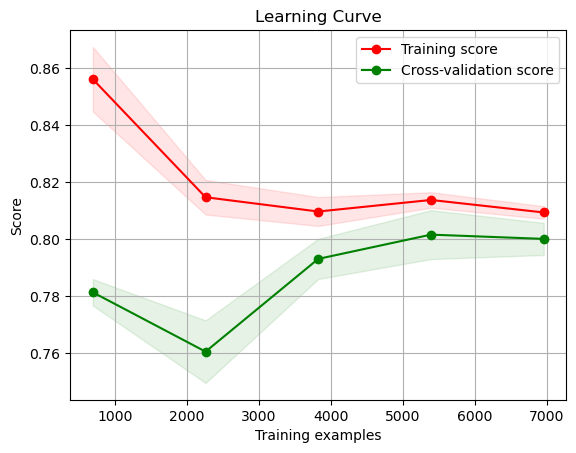

In [67]:
param_grid_xgb_final = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.03,
    'max_depth': 2,
    'min_child_weight': 3,
    'n_estimators': 600,
    'reg_alpha': 0.1,
    'reg_lambda': 2,
    'subsample': 0.6
}


final_model = xgb.XGBClassifier(**param_grid_xgb_final, random_state=42, verbosity=0)
final_accuracies = []
for train_index, val_index in skf.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_val)
    accuracy = accuracy_score(y_val,y_pred)
    final_accuracies.append(accuracy)


print(f'Średnia dokładnosc: {sum(final_accuracies)/len(final_accuracies):.4f}')

plot_learning_curve(final_model, X, y, cv=skf)

### Trenowanie modelu na zbiorze testowym

Zeby wytrenowac model na zbiorze testowym musi byc przygotowny tak samo jak zbiór treningowy.
Zapisze w folderze output wyniki w zbiorze przewidywania

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          4277 non-null   object 
 1   HomePlanet           4277 non-null   int32  
 2   CryoSleep            4277 non-null   int32  
 3   Cabin                4277 non-null   object 
 4   Destination          4277 non-null   int32  
 5   Age                  4277 non-null   float64
 6   VIP                  4277 non-null   int64  
 7   RoomService          4277 non-null   float64
 8   FoodCourt            4277 non-null   float64
 9   ShoppingMall         4277 non-null   float64
 10  Spa                  4277 non-null   float64
 11  VRDeck               4277 non-null   float64
 12  Name                 4183 non-null   object 
 13  GroupID              4277 non-null   int32  
 14  GroupSize            4277 non-null   int64  
 15  cabin_first_label    4277 non-null   i

In [68]:
X_test  = test.drop(['Cabin','Name','PassengerId'], axis = 1)


In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HomePlanet           4277 non-null   int32  
 1   CryoSleep            4277 non-null   int32  
 2   Destination          4277 non-null   int32  
 3   Age                  4277 non-null   float64
 4   VIP                  4277 non-null   int64  
 5   RoomService          4277 non-null   float64
 6   FoodCourt            4277 non-null   float64
 7   ShoppingMall         4277 non-null   float64
 8   Spa                  4277 non-null   float64
 9   VRDeck               4277 non-null   float64
 10  GroupID              4277 non-null   int32  
 11  GroupSize            4277 non-null   int64  
 12  cabin_first_label    4277 non-null   int64  
 13  cabin_secound_label  4277 non-null   int32  
 14  cabin_third_label    4277 non-null   int64  
 15  is_alone             4277 non-null   i

In [70]:
predictions = final_model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': predictions
})
submission['Transported'] = submission['Transported'].astype(bool)

submission.to_csv("../output/submission.csv", index = False)

In [73]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


### Wnioski  z zadania
Wytrenowałem rózne rodzaje modeli najlepszy z nich ma dokładnosc około 81% lecz po wysłaniu wyniki przewidywan zostały one ocenione na 0.61959 %


Moje przemyslenia :
- Kodowanie zmiennych kategorialnych w wartosci numeryczne mogło byc złym pomyłem powinienem zastosowac OneHotEncoding